참조 동영상 주소  
https://www.youtube.com/watch?v=LKMi8Daf2ts

In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd  #!pip install pandas==1.4.0
import os 
from sklearn.metrics import classification_report #!pip install scikit-learn
import seaborn as sn; sn.set(font_scale = 1.4) # !pip install seaborn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['channel', 'gucci']
class_names_label = {class_name: i for i,class_name in enumerate(class_names)}

nb_classes = len(class_names)
print(class_names_label)
IMAGE_SIZE = (150,150)

{'channel': 0, 'gucci': 1}


In [3]:
def load_data():
    DIRECTORY = r"C:\Self_Study\PythonStudy\ImageClassification\image_data"
    CATEGORY = ["train", 'test']
    
    output = []
    
    for category in CATEGORY:
        path = os.path.join(DIRECTORY, category)
        print(path)
        images = []
        labels = []
        
        print("Loading {}".format(category))
        
        for folder in os.listdir(path):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in os.listdir(os.path.join(path, folder)):
                # Get the path name of the image
                img_path = os.path.join(os.path.join(path, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                
                # Append the image and itd corrensponding label to the output
                # print(type(image), image)
                
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        output.append((images, labels))
            
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

C:\Self_Study\PythonStudy\ImageClassification\image_data\train
Loading train
C:\Self_Study\PythonStudy\ImageClassification\image_data\test
Loading test


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
def display_examples(class_names, images, labels):
    """ 
    Display 25 images from the images array with its corresponding labels 
    """
    figsize = (150,150)
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5, 5, i+1) 
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image = cv2.resize(images[i], figsize)
        plt.imshow(image.astype(np.uint8)) #, cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()


In [7]:
display_examples(class_names, train_images, test_labels)

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(1,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

In [70]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 1s 699ms/step - loss: 33.5700 - accuracy: 0.4563 - val_loss: 2857.0786 - val_accuracy: 0.3846
Epoch 2/20
1/1 [==============================] - 0s 408ms/step - loss: 2149.6477 - accuracy: 0.5243 - val_loss: 1579.9716 - val_accuracy: 0.3846
Epoch 3/20
1/1 [==============================] - 0s 420ms/step - loss: 1178.6063 - accuracy: 0.5243 - val_loss: 512.2183 - val_accuracy: 0.3846
Epoch 4/20
1/1 [==============================] - 0s 439ms/step - loss: 370.2581 - accuracy: 0.5243 - val_loss: 66.8598 - val_accuracy: 0.6154
Epoch 5/20
1/1 [==============================] - 0s 425ms/step - loss: 76.6294 - accuracy: 0.4757 - val_loss: 130.7482 - val_accuracy: 0.6154
Epoch 6/20
1/1 [==============================] - 0s 417ms/step - loss: 162.5281 - accuracy: 0.4757 - val_loss: 90.3098 - val_accuracy: 0.6154
Epoch 7/20
1/1 [==============================] - 0s 428ms/step - loss: 108.9708 - accuracy: 0.4757 - val_loss: 29.0271 - val_accuracy: 

In [51]:
def plot_accuracy_loss (history):
    
    # Plot the accuracy and the loss during the training of the nn
    fig = plt.figure(figsize=(10,5))
    
    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = "acc") 
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc") 
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs") 
    plt.legend()
    
    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = "loss") 
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    
    plt.legend()
    plt.show()


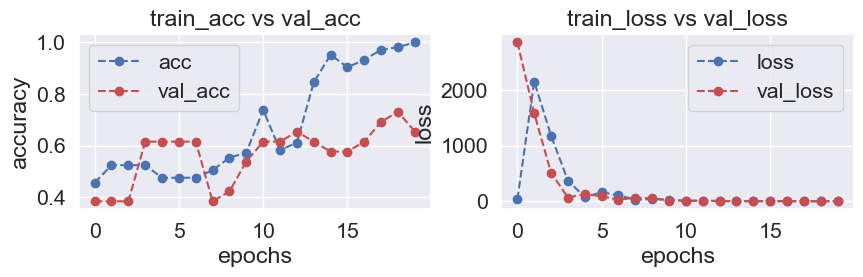

In [71]:
plot_accuracy_loss(history)

In [53]:
test_loss = model.evaluate(test_images, test_labels)

2/2 [==============================] - 0s 19ms/step - loss: 95.5351 - accuracy: 0.5098


In [72]:
predictions = model.predict(test_images) # Vector of probability
pred_labels = np.argmax(predictions, axis=1) # We take the highest probability
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        26
           1       0.00      0.00      0.00        25

    accuracy                           0.51        51
   macro avg       0.25      0.50      0.34        51
weighted avg       0.26      0.51      0.34        51



c:\Users\user\anaconda3\envs\mojimoji\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\mojimoji\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\mojimoji\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print(test_labels)
print(pred_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [56]:
# VGG-16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Model

In [57]:
model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs = model.input, outputs = model.layers[-5].output)

In [58]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [59]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Flatten

In [60]:
model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired Layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired Layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-Layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D (pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# create the model
new_model = Model(layer_input, x)

In [61]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 1s 961ms/step - loss: 1.6622 - accuracy: 0.5437 - val_loss: 2.6975 - val_accuracy: 0.6538
Epoch 2/20
1/1 [==============================] - 1s 911ms/step - loss: 3.2206 - accuracy: 0.5437 - val_loss: 3.3816 - val_accuracy: 0.5385
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 1.7400 - accuracy: 0.6796 - val_loss: 6.0116 - val_accuracy: 0.4231
Epoch 4/20
1/1 [==============================] - 1s 913ms/step - loss: 2.6899 - accuracy: 0.5922 - val_loss: 2.2519 - val_accuracy: 0.7308
Epoch 5/20
1/1 [==============================] - 1s 934ms/step - loss: 4.4507 - accuracy: 0.5243 - val_loss: 4.9780 - val_accuracy: 0.3846
Epoch 6/20
1/1 [==============================] - 1s 920ms/step - loss: 2.1770 - accuracy: 0.5437 - val_loss: 8.1399 - val_accuracy: 0.6154
Epoch 7/20
1/1 [==============================] - 1s 907ms/step - loss: 11.0326 - accuracy: 0.4757 - val_loss: 4.5757 - val_accuracy: 0.3846
Epoch 8/20
1/1 [======

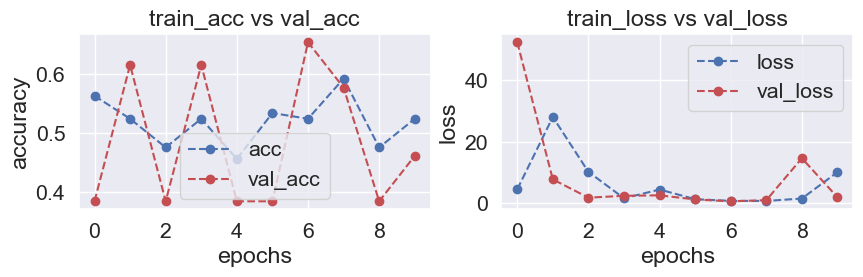

In [63]:
plot_accuracy_loss(history)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
predictions = new_model.predict(test_features) 
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy: {}".format(accuracy_score (test_labels, pred_labels)))

Accuracy: 0.5098039215686274


In [66]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        26
           1       0.00      0.00      0.00        25

    accuracy                           0.51        51
   macro avg       0.25      0.50      0.34        51
weighted avg       0.26      0.51      0.34        51



c:\Users\user\anaconda3\envs\mojimoji\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\mojimoji\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\mojimoji\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
print(test_labels)
print(pred_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
